In [1]:
 
!pip install -U tensorflow==2.11 # Keras 2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 618.2 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 71.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 70.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.

In [2]:

!pip install git+https://github.com/sebastian-sz/efficientnet-lite-keras@main


  Cloning https://github.com/sebastian-sz/efficientnet-lite-keras (to revision main) to /tmp/pip-req-build-s99q8jnh
  Running command git clone --filter=blob:none --quiet https://github.com/sebastian-sz/efficientnet-lite-keras /tmp/pip-req-build-s99q8jnh
  Resolved https://github.com/sebastian-sz/efficientnet-lite-keras to commit 728def97857d8aa83535d9275a1834c7df2316e9
  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet-lite-keras: filename=efficientnet_lite_keras-1.0-py3-none-any.whl size=13105 sha256=dd8d98b8c2925565fa476247c668d417812638eb7b89191fac251f7c58dbe8d7
  Stored in directory: /tmp/pip-ephem-wheel-cache-y_4_okbw/wheels/53/53/c3/2a1138ef96444cfd9bcab9c6a3e4edd56b4ce7e13b1923228c
Successfully built efficientnet-lite-keras

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
from glob import glob
import os
import pathlib
import tensorflow as tf
import keras

from keras.utils import  Sequence
from keras.models import Sequential
from tensorflow.keras.utils import img_to_array, load_img, to_categorical
#models
from efficientnet_lite import EfficientNetLiteB0, EfficientNetLiteB1, EfficientNetLiteB3

from sklearn.metrics import confusion_matrix
#preproces
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
import cv2 as cv
import matplotlib.pyplot as plt

from collections import Counter
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, accuracy_score

import subprocess
from IPython.display import FileLink, display

In [4]:
tf.__version__, keras.__version__

('2.11.0', '2.11.0')

In [13]:
from keras.models import load_model
model = load_model('/kaggle/input/m9_efb1_345_17ep/tensorflow2/m9/1/mushroms_9_efb1_2012_2_t211.h5')

# Data Load

In [14]:

imgs = glob(r'/kaggle/input/mushrooms-classification-common-genuss-images/Mushrooms/*/*')
labels = [el.split('/')[5] for el in imgs ]
SIZE = 345 #414

## Test Train Split

In [17]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [30]:
X_train, X_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.3, random_state=1, stratify=labels)
train = pd.DataFrame(list(zip(X_train,y_train)), columns =['X','y'])
test = pd.DataFrame(list(zip(X_test,y_test)), columns =['X','y'])

In [18]:



datagen = ImageDataGenerator(
        rescale=1./255)
valid_gen = ImageDataGenerator(rescale=1./255)

In [31]:
train_gen = datagen.flow_from_dataframe(train, x_col='X', y_col="y", target_size=(SIZE, SIZE), interpolation='lanczos',)
test_gen = valid_gen.flow_from_dataframe(test, x_col='X', y_col="y", target_size=(SIZE, SIZE), interpolation='lanczos', )

Found 4699 validated image filenames belonging to 9 classes.
Found 2015 validated image filenames belonging to 9 classes.


In [20]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetlite1 (Function  (None, 1280)             4189344   
 al)                                                             
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 210)               269010    
                                                                 
 batch_normalization_1 (Batc  (None, 210)              840       
 hNormalization)                                                 
                                                        

## Metrics

In [21]:
val = model.evaluate(test_gen)
test = model.evaluate(train_gen)


147/147 [==============================] - 133s 900ms/step - loss: 0.8210 - accuracy: 0.9532


In [32]:
from sklearn.preprocessing import LabelEncoder


from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train = keras.utils.to_categorical(y_train, num_classes=9)


#le = LabelEncoder()
y_test = le.fit_transform(y_test)
y_test = keras.utils.to_categorical(y_test, num_classes=9)





In [ ]:
test_gen

63/63 [==============================] - 55s 859ms/step
              precision    recall  f1-score   support

           0       0.09      0.08      0.08       106
           1       0.10      0.09      0.09       225
           2       0.15      0.17      0.16       322
           3       0.12      0.13      0.13       251
           4       0.04      0.04      0.04       109
           5       0.05      0.05      0.05        95
           6       0.25      0.26      0.25       469
           7       0.17      0.17      0.17       345
           8       0.09      0.05      0.07        93

    accuracy                           0.15      2015
   macro avg       0.12      0.12      0.12      2015
weighted avg       0.15      0.15      0.15      2015



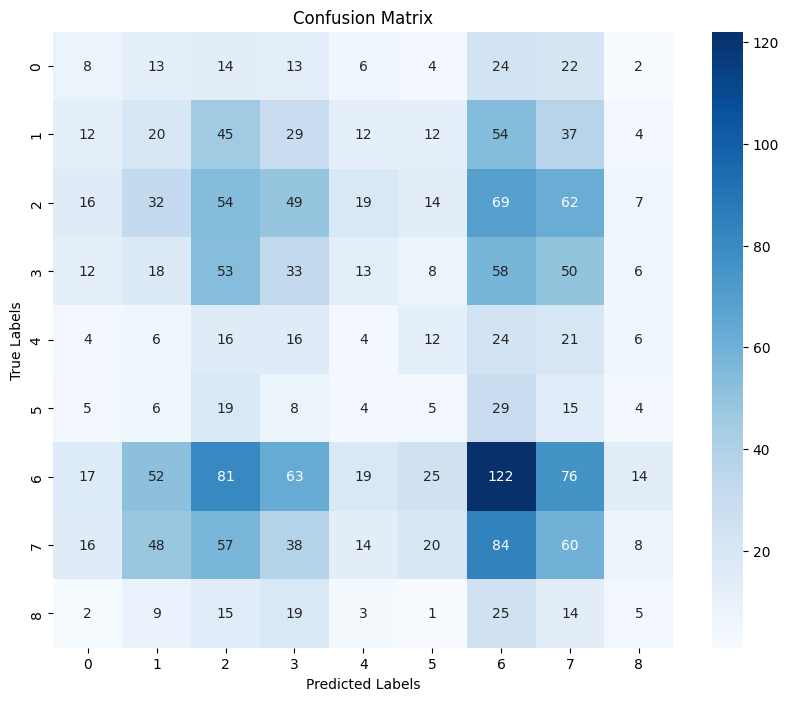

In [35]:


predictions = model.predict(test_gen)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

print(classification_report(true_classes, predicted_classes))

cm = confusion_matrix(true_classes, predicted_classes)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



## Saving the model

## TF lite saving

## Conclusion
accuracy: 0.8953 on val data.  
model - EfficientNetLiteB1  
IMG SIZE - 345  
interpolation - lancos  

Lanczos -  is a sophisticated technique for interpolating digital signals, offering superior image quality compared to simpler methods like nearest neighbor and bilinear interpolation. By effectively preserving detail and minimizing aliasing artifacts, Lanczos resampling is widely used in image and signal processing applications.

To achieve accuracy near 90 % I use lancos for interpolations param. In others attempts for models from EfficientNetLiteB0 to EfficientNetLiteB3 and IMG size from 224 to 400 accuracy didn't secede 82% on val data